# Neural A* Vis and s-t heuristic benchmark errors

Here, the neural A* benchmark's accuracy/error is calculated and it's visualized.

Additionally, the error of the heuristic benchmarks of 9dVis.ipynb are calculated.

1. [Neural A* error and vis]('Neural-A*-error-and-vis)
2. [Heuristic s-t benchmark errors](#Heuristic-s-t-benchmark-errors)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import networkit as nk
import time

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

In [2]:
#import the graph as a sparse adjacency array
adj = sp.sparse.load_npz('data/mb_50m_cost0-union_adj-COO-arr.npz')

## Neural A* error and vis

In [3]:
#Import manually because nk.graph.GraphFromCOO fails with IndexError: Out of bounds on buffer access (axis 0)
t_start = time.time()
nk_graph = nk.graph.Graph(adj.shape[0], weighted=True, directed=False) #create empty graph of correct size
#add edges
for i, j, v in zip(adj.row, adj.col, adj.data):
    nk_graph.addEdge(i, j, v)
t_elapsed = time.time()-t_start
print(t_elapsed)

38.675437927246094


In [4]:
def check_cost(df):
    df['gtruth'] = 0.0
    for ind,(s,t) in enumerate(zip(df.source, df.target)): 
        BiDi = nk.distance.BidirectionalDijkstra(nk_graph,source=int(s),storePred=True,target=int(t))
        BiDi.run()
        BiDi.getDistance()
        true_cost=BiDi.getDistance()
        df.loc[ind,'gtruth']=true_cost
    return df

In [13]:
checked=check_cost(pd.read_csv('data/bench/neuralnet/nAstar_res_20.csv',index_col=0))
checked

source      target  distance        time  vert_tchd    gtruth
0   11515126.0   7428772.0  2.667762  125.638309   327781.0  2.579056
1    4214700.0   3998629.0  2.210546  118.590364   281822.0  2.162134
2   11940356.0  14973415.0  1.295661   18.412347    43858.0  1.132429
3   17520660.0  13648976.0  3.856106  126.259675   290034.0  3.713465
4   11799851.0   7184526.0  3.001672  228.113134   607413.0  2.914107
5   17450370.0   4441539.0  9.892840  808.615412  1827578.0  9.696793
6   13796885.0   5553308.0  4.635780  531.628979  1325247.0  4.453317
7   18332235.0  13991018.0  4.359613  664.612287  1616976.0  4.182644
8   19039760.0   7017070.0  5.545196  648.356333  1433458.0  5.325642
9   10786763.0   1481081.0  5.145778  634.833954  1477493.0  4.798702
10   4928535.0  18015428.0  6.820981  653.304931  1592396.0  6.439863
11  21520104.0  12934640.0  5.761013  299.711052   803741.0  5.607245
12   8889974.0   4591557.0  1.839803  176.847753   417824.0  1.763411
13  16859892.0  16431129.0  1.589195   79.967507   193777.0  1.579423
14  14497259.0  20264757.0  2.488521  213.854605   458369.0  2.455097
15   9253804.0  16499185.0  2.822063  112.466084   230809.0  2.739729
16  14941927.0  18189552.0  4.246518  536.885557  1158481.0  4.163980
17  14248601.0   2244834.0  6.231013  774.459432  1990763.0  5.973820
18  15274749.0  18802429.0  4.204096  442.470128  1034215.0  3.962992
19  11678364.0  18421950.0  2.994824  105.869822   229825.0  2.767084

In [15]:
err= checked.distance-checked.gtruth
print(err.mean())
print(err.std())
print('')
print(err.abs().mean())
print(err.abs().std())
print('')
print((err.abs()/checked.gtruth).mean())
print((err.abs()/checked.gtruth).std())
print('')
print((checked.time/checked.distance).mean())
print((checked.time/checked.distance).std())
print('')
print(((checked.vert_tchd*10**(-5))/checked.distance).mean())
print(((checked.vert_tchd*10**(-5))/checked.distance).std())

0.1599023629445583
0.10023313615956844

0.1599023629445583
0.10023313615956844

0.043611867394419954
0.030424987748157533

81.21006768432778
38.792223071314226

1.9259751867838617
0.9286122769301695


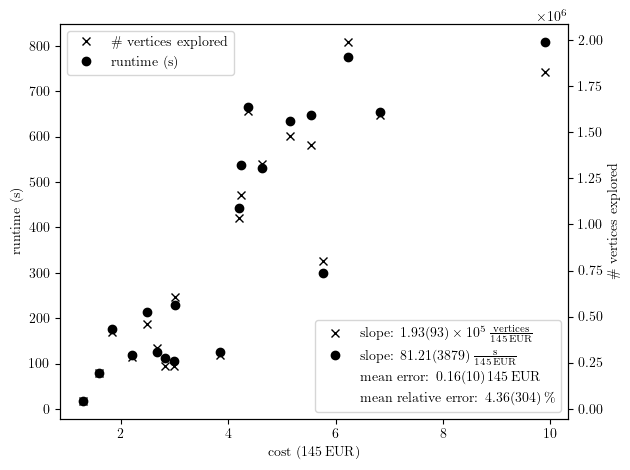

In [30]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(checked.distance, checked.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'\# vertices explored')
vert =ax2.plot(checked.distance, checked.vert_tchd, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label='\\# vertices explored',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label='runtime (s)',linestyle='')
ax1.legend(handles=[x,o])

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $1.93(93) \times 10^5 \, \frac{\mathrm{vertices}}{145\, \mathrm{EUR}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $81.21(3879) \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
abso = mlines.Line2D([], [], color='black', marker='', label=r'mean error: $0.16(10) \, 145\, \mathrm{EUR}$',linestyle='')
rerr = mlines.Line2D([], [], color='black', marker='', label=r'mean relative error: $4.36(304) \, \%$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope,abso,rerr],loc=4)

fig.tight_layout()
plt.savefig('data/vis/nn/nAstar_res_20.pdf', format='pdf')
plt.show()

In [27]:
print((checked.time/(checked.vert_tchd*10**(-6))).mean())
print((checked.time/(checked.vert_tchd*10**(-6))).std())

424.2632687058052
31.54157975479938


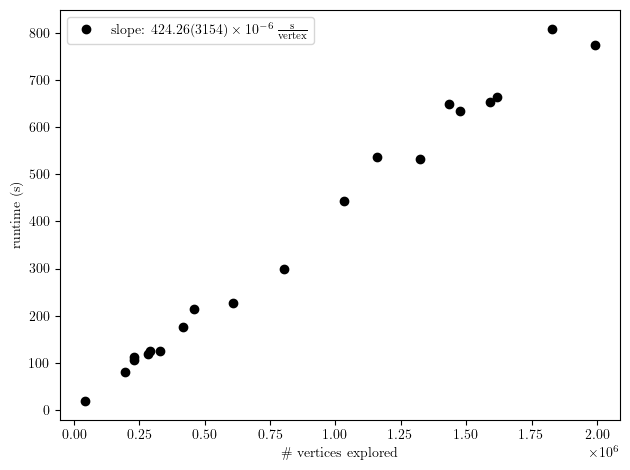

In [29]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'\# vertices explored')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(checked.vert_tchd, checked.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $424.26(3154) \times 10^{-6} \, \frac{\mathrm{s}}{\mathrm{vertex}}$',linestyle='')
ax1.legend(handles=[o_slope])
fig.tight_layout()
plt.savefig('data/vis/nn/nAstar_res_20_vert-t.pdf', format='pdf')
plt.show()

## Heuristic s-t benchmark errors

### Neural

In [7]:
checked=check_cost(pd.read_csv('data/bench/neuralnet/nn_SSST_res_20.csv',index_col=0))
checked

source      target  distance      time    gtruth
0   11511360.0   9303701.0  3.887177  0.000608  4.277541
1    1914952.0  15925953.0  6.497999  0.000224  6.660664
2    4318611.0  16252127.0  5.352218  0.000193  5.332414
3   17732718.0  11262990.0  6.060903  0.000185  5.745006
4    4405480.0  18953838.0  7.047938  0.000185  7.522585
5   22331959.0  16727559.0  2.461018  0.000184  2.686334
6    8164769.0  20871196.0  5.693563  0.000224  5.430206
7   17536418.0   7391644.0  5.832435  0.000189  5.827838
8   13458810.0  12281815.0  3.381639  0.000221  3.673330
9    8477046.0  13915407.0  3.074345  0.000230  3.154890
10  20340218.0   2213595.0  9.613821  0.000236  9.670595
11   9647256.0  15079961.0  2.423155  0.000222  2.029195
12  17497932.0  20970927.0  3.386177  0.000199  3.388557
13  20910513.0  15541173.0  2.350930  0.000190  2.389737
14   8553777.0  13959363.0  2.564277  0.000193  2.415319
15   1227992.0   5612376.0  1.665227  0.000185  1.765246
16  18463209.0  10312123.0  4.785429  0.000184  4.390510
17  19225415.0  17694258.0  2.168801  0.000184  2.064311
18   4519224.0   7234738.0  2.317006  0.000186  2.161752
19   8757071.0   8368970.0  1.396036  0.000223  1.133655

In [8]:
err= checked.distance-checked.gtruth
print(err.mean())
print(err.std())
print('')
print(err.abs().mean())
print(err.abs().std())
print('')
print((err.abs()/checked.gtruth).mean())
print((err.abs()/checked.gtruth).std())
print('')
print(checked.time.mean())
print(checked.time.std())

0.012020465306704909
0.24763111535831864

0.1943412500841078
0.1473666424115131

0.06273497368134875
0.05980589906829068

0.000222313404083215
9.262478142074828e-05


### Unweighted

In [9]:
checked=check_cost(pd.read_csv('data/bench/neuralnet/std_SSST_res_20.csv',index_col=0))
checked

source      target  distance      time    gtruth
0   17788223.0  16749820.0  1.846099  0.000022  2.218199
1   17500305.0   3356822.0  4.708469  0.000009  6.094011
2    6533670.0  15600249.0  3.185842  0.000008  4.082530
3   13409326.0   7148942.0  2.087450  0.000008  2.931638
4   12387509.0  16027033.0  1.796346  0.000007  2.342086
5   11070939.0   7382746.0  1.240864  0.000007  1.567572
6    3220290.0  19098840.0  5.142835  0.000007  7.042064
7    8813233.0   3226114.0  2.001816  0.000007  2.328239
8    8098607.0  15502558.0  2.453021  0.000007  3.399539
9    7592183.0   3528393.0  1.467723  0.000006  1.887287
10   3256269.0  14378659.0  4.302720  0.000006  6.062034
11   5716193.0   9984224.0  2.202882  0.000007  2.837061
12   7456207.0  11293263.0  1.463752  0.000007  4.235996
13  15520838.0   8915360.0  3.375951  0.000008  4.857351
14  13536230.0  12048118.0  1.668966  0.000008  1.941800
15  11222388.0  13747839.0  2.086493  0.000008  2.456080
16   5118507.0  18868357.0  4.351632  0.000008  6.407911
17  19507009.0  15714489.0  1.340587  0.000008  1.602644
18  15929288.0  21451362.0  5.228221  0.000006  6.186933
19   6664317.0  19410021.0  4.440418  0.000007  5.156019

In [10]:
err= checked.distance-checked.gtruth
print(err.mean())
print(err.std())
print('')
print(err.abs().mean())
print(err.abs().std())
print('')
print((err.abs()/checked.gtruth).mean())
print((err.abs()/checked.gtruth).std())
print('')
print(checked.time.mean())
print(checked.time.std())

-0.9622452837306101
0.7094527865725372

0.9622452837306101
0.7094527865725372

0.23985499528035667
0.11432601343806315

7.975101470947266e-06
3.394276636851391e-06


### Weighted

In [11]:
checked=check_cost(pd.read_csv('data/bench/neuralnet/stdw_SSST_res_20.csv',index_col=0))
checked

source      target  distance      time    gtruth
0   13724884.0   3298867.0  5.320122  0.000013  6.389617
1     369082.0   1784044.0  0.708341  0.000007  1.058849
2   13118479.0   9110383.0  2.698942  0.000007  3.091291
3   15289662.0   5833689.0  3.834090  0.000007  4.378649
4   18750731.0  11278522.0  3.431830  0.000007  3.104096
5   18851656.0   6023052.0  5.692136  0.000007  6.625108
6    2869144.0  18004238.0  7.745203  0.000008  8.159968
7   17801083.0  17296673.0  3.350700  0.000007  3.399144
8    6239667.0  16327374.0  4.675824  0.000006  4.364664
9   18457889.0  15375994.0  1.834810  0.000006  1.778205
10  18851729.0   3106941.0  7.423821  0.000006  9.147450
11  19423169.0   8234413.0  6.767130  0.000007  8.794021
12   6886804.0  20525735.0  7.185937  0.000007  7.419115
13   8076180.0  10669866.0  1.842426  0.000007  2.679462
14  14603000.0  21086470.0  5.936422  0.000006  5.304643
15  12823886.0  14228169.0  5.734654  0.000006  6.707736
16  10351813.0   7043548.0  1.584518  0.000006  3.662680
17  16611374.0  19983594.0  1.554043  0.000006  1.655401
18   5210191.0  16988317.0  5.388800  0.000006  5.963507
19   4025193.0  13875387.0  4.715060  0.000007  4.795621

In [12]:
err= checked.distance-checked.gtruth
print(err.mean())
print(err.std())
print('')
print(err.abs().mean())
print(err.abs().std())
print('')
print((err.abs()/checked.gtruth).mean())
print((err.abs()/checked.gtruth).std())
print('')
print(checked.time.mean())
print(checked.time.std())

-0.5527209209823127
0.7506286664470802

0.6854485861307353
0.6248636713719644

0.14664945359210044
0.13309898523728922

7.176399230957032e-06
1.5449353515200738e-06


In [31]:
9.262478142

7.974999999999999e-06